# C)

El lagrangiano del sistema esta dado por:

\begin{equation}
L=\frac{1}{2} I_0 (\dot{\theta}^2 + \dot{\phi}^2 \sin^2{\theta}) + \frac{1}{2} I_z  (\dot{\phi}^2 \cos{\theta} + \dot{\psi})^2 -mgd\cos{\theta}
\end{equation}


Segun las ecuaciones de Euler-Lagrange:

\begin{equation}
\frac{d}{dt}\bigg(\frac{\partial L}{\partial \dot{q_i}}\bigg) = \frac{\partial L}{\partial {q_i}}
\end{equation}


Entonces:

\begin{equation}
\frac{d}{dt}\bigg(\frac{\partial L}{\partial \dot{\phi}}\bigg)= \frac{\partial L}{\partial {\phi}}
\end{equation}

Como $L$ no depende explicitamente de $\phi$:

\begin{equation}
\frac{d}{dt}\bigg(\frac{\partial L}{\partial \dot{\phi}}\bigg)= 0
\end{equation}

Entonces:

\begin{equation}
\frac{\partial L}{\partial \dot{\phi}}=p_\phi =cte
\end{equation}



\begin{equation}
\frac{\partial L}{\partial \dot{\phi}}= I_0 \dot{\phi} \sin^2{\theta} + I_z (\dot{\phi}^2 \cos{\theta} +\dot{\psi}) 2 \dot{\phi} \cos{\theta}=
\end{equation}




 

In [4]:
%matplotlib notebook
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from IPython.display import HTML



In [23]:
def System(r_,t,m,r,d,g,psidot,theta0):
    
    phi=r_[0]
    psi=r_[1]
    theta=r_[2]
    omega=r_[3]
    
    Iz=0.5*m*r**2
    I0=0.25*m*r**2+m*d**2
    
 
    
    
    dphi= (Iz*psidot*(np.cos(theta0)-np.cos(theta)))/(I0*np.sin(theta)**2+Iz*np.cos(theta)**2)
    
    
    dpsi= psidot
    
    dtheta=omega
    
    domega = 1/(I0) * (dphi**2 *(np.sin(theta)*np.cos(theta))*(I0-dphi**2*Iz)- dphi**2*dpsi*Iz*np.sin(theta) + m*g*d*np.sin(theta) )
  
                                     
    
    
    
    return [dphi,dpsi,dtheta,domega]
                    

In [24]:
m=0.1
r=0.1
d=0.3
g=9.81
psidot=400
theta0=0.25*np.pi
t=np.linspace(0,8,10000)
r0=[0,0,theta0,0]



In [25]:
sol= odeint(System,r0,t,args=(m,r,d,g,psidot,theta0))

In [26]:
phi=sol[:,0]
psi=sol[:,1]
theta=sol[:,2]
thetadot=sol[:,3]


<IPython.core.display.Javascript object>


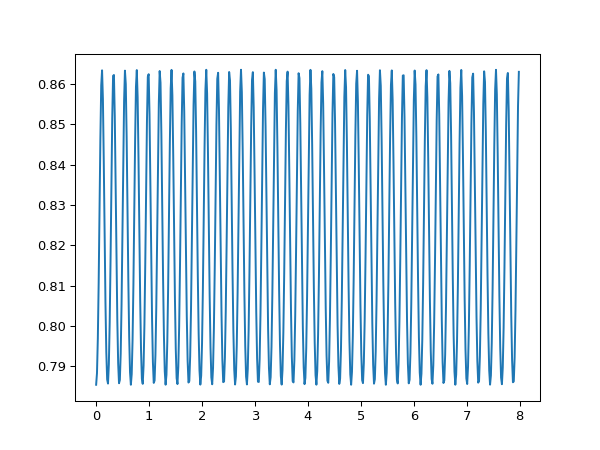

In [27]:
fig2 = plt.figure()
ax2 = fig2.add_subplot()
ax2.plot(t[::20],theta[::20])

<IPython.core.display.Javascript object>


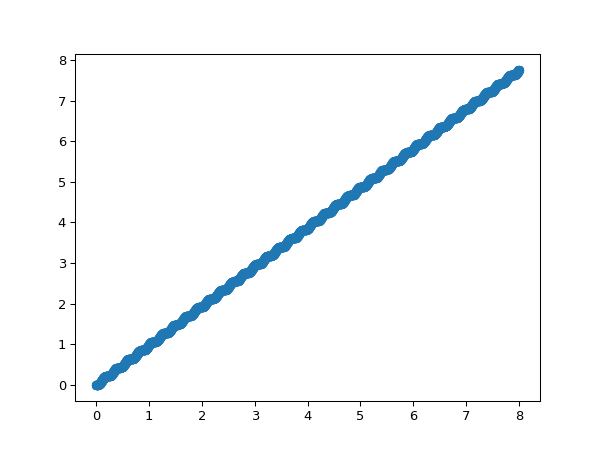

In [28]:
fig1 = plt.figure()
ax1 = fig1.add_subplot()
ax1.scatter(t,phi)

<IPython.core.display.Javascript object>


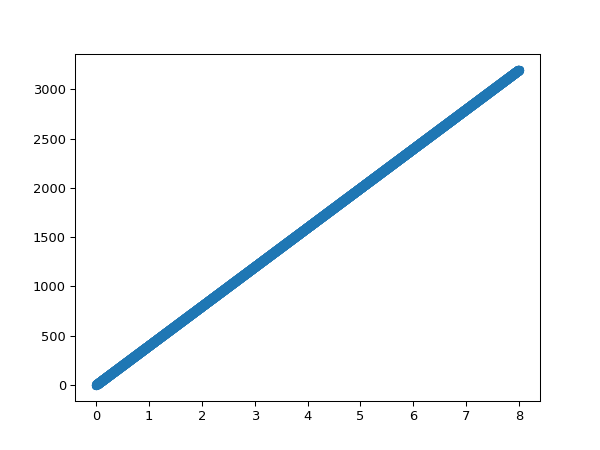

In [29]:
fig3 = plt.figure()
ax3 = fig3.add_subplot()
ax3.scatter(t,psi)

In [30]:

position=np.zeros([len(t),3])

for i in range(len(t)):
    position[i,0]=d*np.sin(theta[i])*np.cos(phi[i])
    position[i,1]=d*np.sin(theta[i])*np.sin(phi[i])
    position[i,2]=d*np.cos(theta[i])
    
    


<IPython.core.display.Javascript object>


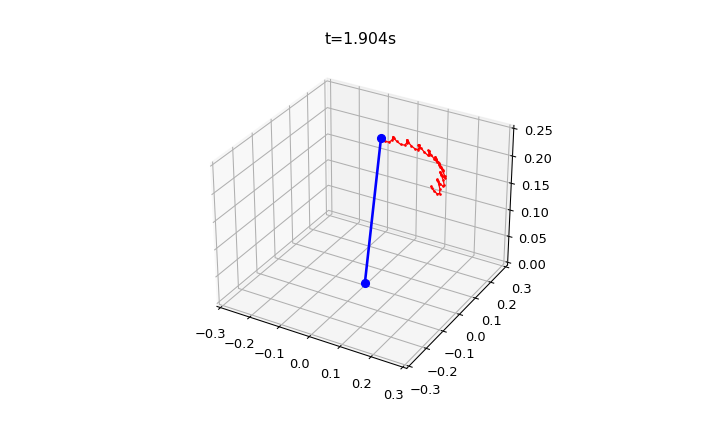

In [31]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(projection='3d')
scale=35

def init():
    
    ax.clear()
    ax.set_xlim(-0.3,0.3)
    ax.set_ylim(-0.3,0.3)
    ax.set_zlim(0,0.25)
    

    




def Update(i):
    
    init()

        
    x = position[::scale][i,0]
    y = position[::scale][i,1]
    z = position[::scale][i,2]
    
    history_x=position[::scale][:i,0]
    history_y=position[::scale][:i,1]
    history_z=position[::scale][:i,2]
    
    
      
    if i<=1000:
    
     
      ax.plot(history_x, history_y,history_z,'.-', lw=1, ms=2,c="r")
    
    else:     
      ax.plot(history_x[i-30:i], history_y[i-30:i],history_z[i-30:i],'.-', lw=1, ms=2,c="r")

    ax.scatter(x,y,z,c="b")
    ax.plot([0,x], [0,y],[0,z], 'o-', lw=2,c="b")
    ax.set_title(r't={:.3f}s'.format(t[::scale][i]))
  
    
    
Animation = anim.FuncAnimation(fig,Update,frames=len(t[::scale]),init_func=init)


In [94]:
T_precesion=[]

for i in range(len(phi)):
    
    if phi[i]> 2*np.pi- 1e-3 and phi[i]< 2*np.pi+1e-3:
        
        T_precesion.append(t[i])
    
    
np.mean(T_nutacion)

6.470247024702471